In [159]:
%config IPCompleter.greedy=True

In [160]:
import pandas as pd
import numpy as np
import math
import datetime
from Tools import *

In [161]:
def format_time(dfTime):
    x=[]
    for i in dfTime:
        i=str(i)
        new_i=""
        count=1
        for j in i:
            if count%2==0 and count!=len(i):
                new_i+=j
                new_i+=":"
            else:
                new_i+=j
            count+=1
        x.append(new_i)
    xy=pd.Series(x)
    return xy

In [162]:
def add_minute(df):
    from datetime import date
    from dateutil.relativedelta import relativedelta
    
    c=pd.to_datetime(df)
    after6M=c+relativedelta(minutes=+6)
    befor6M=c+relativedelta(minutes=-6)
    return after6M,befor6M


In [163]:
def add_minute2(df):
    from datetime import date
    from dateutil.relativedelta import relativedelta
    minutes=[]

    c=pd.to_datetime(df)
    after6M=c+relativedelta(minutes=+6)
    #befor6M=c+relativedelta(minutes=-6)
    #minutes.append([after6M,befor6M,i])
    return after6M

Fiyatlar okunuyor

In [164]:
df=pd.read_csv("tsla.us.txt",sep=",",names=['TICKER','PER','DATE','TIME','OPEN','HIGH','LOW','CLOSE','VOL','OPENINT'])

Gereksiz kolonlar siliniyor. Date kolonu formatlanıyor

In [165]:
df=df.drop(["PER","TICKER"],axis='columns')
df["DATE2"]=pd.to_datetime(df["DATE"],format="%Y%m%d")
df["DATE2"]=df["DATE2"].apply(lambda x: datetime.datetime.strftime(x, "%d/%m/%Y"))
df["TIME2"]=format_time(df["TIME"])
#df["ID"]=[i for i in range(0,len(df))]
df.insert(0,"ID",range(0,len(df)))

In [166]:
df.tail()

,ID,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT,DATE2,TIME2
2725,2725,20201019,213500,431.83,433.04,431.700,432.885,334562,0,19/10/2020,21:35:00
2726,2726,20201019,214000,432.86,432.90,431.610,431.980,274050,0,19/10/2020,21:40:00
2727,2727,20201019,214500,432.00,433.95,431.955,433.950,268830,0,19/10/2020,21:45:00
2728,2728,20201019,215000,433.95,434.12,432.240,432.600,380857,0,19/10/2020,21:50:00
2729,2729,20201019,215500,432.60,432.85,430.410,430.830,1028440,0,19/10/2020,21:55:00


Günlük fiyat değişimleri hesaplanıyor

In [167]:
df["DIFF"]=df["CLOSE"]-df["OPEN"]
df.loc[df['DIFF'] < 0, 'STATUS'] = -1
df.loc[df['DIFF'] > 0, 'STATUS'] = 1
df.loc[df['DIFF'] == 0, 'STATUS'] = 0 ## TO-DO: Bir tolerans aralığındaki değerleri 0 olarak işaretlenmesi yapıladak.
df["DIFF_PERC"]=(df["DIFF"]*100)/df["OPEN"]
df

,ID,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT,DATE2,TIME2,DIFF,STATUS,DIFF_PERC
0,0,20200831,153000,444.61,450.49,440.110,447.029,1766358,0,31/08/2020,15:30:00,2.419,1.0,0.544072
1,1,20200831,153500,447.04,447.80,441.210,442.160,661342,0,31/08/2020,15:35:00,-4.880,-1.0,-1.091625
2,2,20200831,154000,442.08,452.28,440.710,452.149,722964,0,31/08/2020,15:40:00,10.069,1.0,2.277642
3,3,20200831,154500,451.84,459.53,450.050,459.408,1570773,0,31/08/2020,15:45:00,7.568,1.0,1.674929
4,4,20200831,155000,459.20,461.00,455.500,456.410,1346307,0,31/08/2020,15:50:00,-2.790,-1.0,-0.607578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,2725,20201019,213500,431.83,433.04,431.700,432.885,334562,0,19/10/2020,21:35:00,1.055,1.0,0.244309
2726,2726,20201019,214000,432.86,432.90,431.610,431.980,274050,0,19/10/2020,21:40:00,-0.880,-1.0,-0.203299
2727,2727,20201019,214500,432.00,433.95,431.955,433.950,268830,0,19/10/2020,21:45:00,1.950,1.0,0.451389
2728,2728,20201019,215000,433.95,434.12,432.240,432.600,380857,0,19/10/2020,21:50:00,-1.350,-1.0,-0.311096


Zaman kolunu formatlanıyor. DATETIME kolonu oluşturuluyor

In [168]:
df["DATETIME"]=df["DATE2"]+" "+df["TIME2"]
df["DATETIME"]=pd.to_datetime(df["DATETIME"])
df["DATETIME"]=df["DATETIME"].apply(lambda x: datetime.datetime.strftime(x, "%d/%m/%Y %H:%M:%S"))
df["DATETIME"]=pd.to_datetime(df["DATETIME"])
df

,ID,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT,DATE2,TIME2,DIFF,STATUS,DIFF_PERC,DATETIME
0,0,20200831,153000,444.61,450.49,440.110,447.029,1766358,0,31/08/2020,15:30:00,2.419,1.0,0.544072,2020-08-31 15:30:00
1,1,20200831,153500,447.04,447.80,441.210,442.160,661342,0,31/08/2020,15:35:00,-4.880,-1.0,-1.091625,2020-08-31 15:35:00
2,2,20200831,154000,442.08,452.28,440.710,452.149,722964,0,31/08/2020,15:40:00,10.069,1.0,2.277642,2020-08-31 15:40:00
3,3,20200831,154500,451.84,459.53,450.050,459.408,1570773,0,31/08/2020,15:45:00,7.568,1.0,1.674929,2020-08-31 15:45:00
4,4,20200831,155000,459.20,461.00,455.500,456.410,1346307,0,31/08/2020,15:50:00,-2.790,-1.0,-0.607578,2020-08-31 15:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,2725,20201019,213500,431.83,433.04,431.700,432.885,334562,0,19/10/2020,21:35:00,1.055,1.0,0.244309,2020-10-19 21:35:00
2726,2726,20201019,214000,432.86,432.90,431.610,431.980,274050,0,19/10/2020,21:40:00,-0.880,-1.0,-0.203299,2020-10-19 21:40:00
2727,2727,20201019,214500,432.00,433.95,431.955,433.950,268830,0,19/10/2020,21:45:00,1.950,1.0,0.451389,2020-10-19 21:45:00
2728,2728,20201019,215000,433.95,434.12,432.240,432.600,380857,0,19/10/2020,21:50:00,-1.350,-1.0,-0.311096,2020-10-19 21:50:00


In [169]:
df_news=pd.read_csv("TeslaNews.csv")

In [170]:
df_news.info()
df_news.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9600 non-null   int64 
 1   Dates       9600 non-null   object
 2   Text        9600 non-null   object
 3   Link        9600 non-null   object
dtypes: int64(1), object(3)
memory usage: 300.1+ KB


,Unnamed: 0,Dates,Text,Link
0,0,Oct 13 2020 7:41AM EDT,Eikon search string for individual stock moves...,https://www.nasdaq.com/articles/buzz-u.s.-stoc...
1,1,Oct 13 2020 7:11AM EDT,"Back in 1993, when drugmaker Amarin's (NASDAQ:...",https://www.nasdaq.com/articles/the-top-2-cont...
2,2,Oct 13 2020 7:06AM EDT,Electric vehicle pioneer Tesla (NASDAQ: TSLA) ...,https://www.nasdaq.com/articles/forget-tesla-i...
3,3,Oct 13 2020 6:22AM EDT,Oct 13 (Reuters) - Tesla Inc TSLA.Osaid on Tue...,https://www.nasdaq.com/articles/tesla-cuts-pri...
4,4,Oct 13 2020 5:28AM EDT,"Adds details, backgroundBEIJING, Oct 13 (Reute...",https://www.nasdaq.com/articles/audi-to-launch...


Gereksiz kolonlar silindi

In [171]:
df_news.drop(df_news.columns[df_news.columns.str.contains("Unnamed",case=False)],axis=1,inplace=True)

"ID" kolonu eklendi

Date kolonu formatlanıyor

In [172]:
df_news['DATETIME'] = pd.to_datetime(df_news['Dates'])
#df_news['NewDates'] = df_news['NewDates'].dt.tz_localize('US/Eastern').dt.tz_convert('UTC')
df_news['DATETIME'] = df_news['DATETIME'].apply(lambda x: datetime.datetime.replace(x, tzinfo=None))
df_news

C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,Dates,Text,Link,DATETIME
0,Oct 13 2020 7:41AM EDT,Eikon search string for individual stock moves...,https://www.nasdaq.com/articles/buzz-u.s.-stoc...,2020-10-13 07:41:00
1,Oct 13 2020 7:11AM EDT,"Back in 1993, when drugmaker Amarin's (NASDAQ:...",https://www.nasdaq.com/articles/the-top-2-cont...,2020-10-13 07:11:00
2,Oct 13 2020 7:06AM EDT,Electric vehicle pioneer Tesla (NASDAQ: TSLA) ...,https://www.nasdaq.com/articles/forget-tesla-i...,2020-10-13 07:06:00
3,Oct 13 2020 6:22AM EDT,Oct 13 (Reuters) - Tesla Inc TSLA.Osaid on Tue...,https://www.nasdaq.com/articles/tesla-cuts-pri...,2020-10-13 06:22:00
4,Oct 13 2020 5:28AM EDT,"Adds details, backgroundBEIJING, Oct 13 (Reute...",https://www.nasdaq.com/articles/audi-to-launch...,2020-10-13 05:28:00
...,...,...,...,...
9595,Apr 29 2016 3:43AM EDT,Tesla CEO Elon Musk introduces the Model X. So...,https://www.nasdaq.com/articles/mark-zuckerber...,2016-04-29 03:43:00
9596,Apr 29 2016 2:22AM EDT,Ford ( F ) reported an all time record pre-tax...,https://www.nasdaq.com/articles/ford-posts-rec...,2016-04-29 02:22:00
9597,Apr 28 2016 11:44AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/alphabet-inc%3...,2016-04-28 11:44:00
9598,Apr 28 2016 10:23AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/apple-inc.-aap...,2016-04-28 10:23:00


In [173]:
## TO-DO: Stock price EDT formatında mı? Kontrol edilecek.
df_news

,Dates,Text,Link,DATETIME
0,Oct 13 2020 7:41AM EDT,Eikon search string for individual stock moves...,https://www.nasdaq.com/articles/buzz-u.s.-stoc...,2020-10-13 07:41:00
1,Oct 13 2020 7:11AM EDT,"Back in 1993, when drugmaker Amarin's (NASDAQ:...",https://www.nasdaq.com/articles/the-top-2-cont...,2020-10-13 07:11:00
2,Oct 13 2020 7:06AM EDT,Electric vehicle pioneer Tesla (NASDAQ: TSLA) ...,https://www.nasdaq.com/articles/forget-tesla-i...,2020-10-13 07:06:00
3,Oct 13 2020 6:22AM EDT,Oct 13 (Reuters) - Tesla Inc TSLA.Osaid on Tue...,https://www.nasdaq.com/articles/tesla-cuts-pri...,2020-10-13 06:22:00
4,Oct 13 2020 5:28AM EDT,"Adds details, backgroundBEIJING, Oct 13 (Reute...",https://www.nasdaq.com/articles/audi-to-launch...,2020-10-13 05:28:00
...,...,...,...,...
9595,Apr 29 2016 3:43AM EDT,Tesla CEO Elon Musk introduces the Model X. So...,https://www.nasdaq.com/articles/mark-zuckerber...,2016-04-29 03:43:00
9596,Apr 29 2016 2:22AM EDT,Ford ( F ) reported an all time record pre-tax...,https://www.nasdaq.com/articles/ford-posts-rec...,2016-04-29 02:22:00
9597,Apr 28 2016 11:44AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/alphabet-inc%3...,2016-04-28 11:44:00
9598,Apr 28 2016 10:23AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/apple-inc.-aap...,2016-04-28 10:23:00


Tekrarlı veriler hesaplanıp temizleniyor

In [174]:
#df_news["Dates"]=datetime.strptime(df_news["Dates"],"%d/%m/%Y")
#df_news['NewDates'] = df_news['NewDates'].apply(lambda x: datetime.datetime.strftime(x, "%d/%m/%Y %H:%M:%S"))


df_temp=df_news[df_news.duplicated(keep=False)]
print("Tüm kolonlar tekrarlı veri sayısı: ",df_temp.shape)
df_temp=df_news[df_news.duplicated(subset=["Text"],keep=False)]
print("Text kolonu  tekrarlı veri sayısı: ",df_temp.shape)
df_temp=df_temp.drop(["Link"],axis=1)
df_temp


Tüm kolonlar tekrarlı veri sayısı:  (10, 4)
Text kolonu  tekrarlı veri sayısı:  (100, 4)


,Dates,Text,DATETIME
70,Oct 6 2020 9:10AM EDT,"InvestorPlace - Stock Market News, Stock Advic...",2020-10-06 09:10:00
89,Oct 4 2020 9:00AM EDT,"By David RandallNEW YORK, Oct 2 (Reuters) - In...",2020-10-04 09:00:00
97,Oct 2 2020 4:52PM EDT,"By David RandallNEW YORK, Oct 2 (Reuters) - In...",2020-10-02 16:52:00
172,Sep 29 2020 2:00AM EDT,"By Marc JonesLONDON, Sept 28 (Reuters) - Finan...",2020-09-29 02:00:00
175,Sep 28 2020 7:00PM EDT,"By Marc JonesLONDON, Sept 28 (Reuters) - Finan...",2020-09-28 19:00:00
...,...,...,...
8096,Feb 28 2017 7:31AM EST,"The stock market is, for lack of a better word...",2017-02-28 07:31:00
8129,Feb 24 2017 12:12PM EST,Shutterstock photoThe broad stock market outpa...,2017-02-24 12:12:00
8130,Feb 24 2017 12:12PM EST,Shutterstock photoThe broad stock market outpa...,2017-02-24 12:12:00
8583,Nov 17 2016 2:14AM EST,"According to Trefis estimates, nearly half of ...",2016-11-17 02:14:00


In [175]:
df_news[df_news.duplicated(subset=["DATETIME"],keep=False)]
df_news=df_news.sort_values("DATETIME",ascending=True)
df_news.insert(0,"ID",range(0,len(df_news)))

+- 6 dk eklendi.

In [176]:
for i in range(0,len(df)):
    after=add_minute(df["DATETIME"][i])[0]
    df.loc[i,"AFTER"]=after
    before=add_minute(df["DATETIME"][i])[1]
    df.loc[i,"BEFORE"]=before

    


In [177]:
df_s=df.loc[:,["ID","OPEN","HIGH","LOW","CLOSE","STATUS","DIFF_PERC","DATETIME"]]

[  2.   1.   0.   1.   1.   1.   2.   6.  15.  12.  33.  59. 150. 453.
 922. 635. 250.  92.  50.  14.   8.   7.   9.   3.   1.   0.   1.   1.
   0.   1.]
[-4.34388049 -4.04847583 -3.75307118 -3.45766652 -3.16226186 -2.8668572
 -2.57145255 -2.27604789 -1.98064323 -1.68523857 -1.38983392 -1.09442926
 -0.7990246  -0.50361995 -0.20821529  0.08718937  0.38259403  0.67799868
  0.97340334  1.268808    1.56421266  1.85961731  2.15502197  2.45042663
  2.74583128  3.04123594  3.3366406   3.63204526  3.92744991  4.22285457
  4.51825923]
<a list of 30 Patch objects>


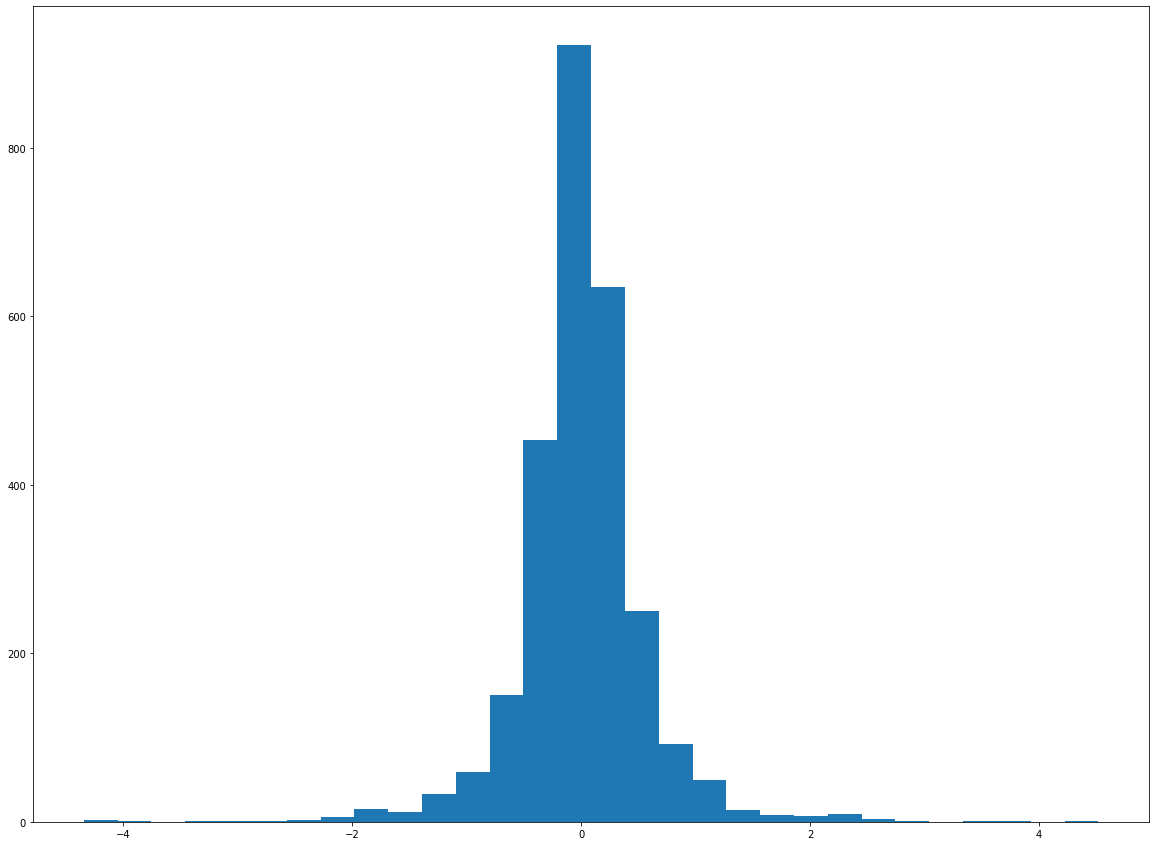

In [178]:
import matplotlib.pyplot as plt
#df_s["DIFF_PERC"].hist(bins=50)
plt.figure(figsize=(20,15))
counts, bins, bars = plt.hist(df_s["DIFF_PERC"],bins=30)
print(counts)
print(bins)
print(bars)
## -0.20821529  0.08718937 bu aralığı "0" sayacağız

In [179]:
#df_s.insert(0,"ID",range(0,len(df_s)))


In [180]:

print(df_s.head())
df_s=df_s.set_index("ID")
print("Index Name: ",df_s.index.name)
start_date="2020-08-31 15:30:00"
end_date="2020-08-31 15:50:00"
mask = (df_s['DATETIME'] > start_date) & (df_s['DATETIME'] <= end_date)
df_s.loc[mask]
print(df_s.head())
print(df_s.columns)

   ID    OPEN    HIGH     LOW    CLOSE  STATUS  DIFF_PERC            DATETIME
0   0  444.61  450.49  440.11  447.029     1.0   0.544072 2020-08-31 15:30:00
1   1  447.04  447.80  441.21  442.160    -1.0  -1.091625 2020-08-31 15:35:00
2   2  442.08  452.28  440.71  452.149     1.0   2.277642 2020-08-31 15:40:00
3   3  451.84  459.53  450.05  459.408     1.0   1.674929 2020-08-31 15:45:00
4   4  459.20  461.00  455.50  456.410    -1.0  -0.607578 2020-08-31 15:50:00
Index Name:  ID
      OPEN    HIGH     LOW    CLOSE  STATUS  DIFF_PERC            DATETIME
ID                                                                        
0   444.61  450.49  440.11  447.029     1.0   0.544072 2020-08-31 15:30:00
1   447.04  447.80  441.21  442.160    -1.0  -1.091625 2020-08-31 15:35:00
2   442.08  452.28  440.71  452.149     1.0   2.277642 2020-08-31 15:40:00
3   451.84  459.53  450.05  459.408     1.0   1.674929 2020-08-31 15:45:00
4   459.20  461.00  455.50  456.410    -1.0  -0.607578 2020-08-31 

In [181]:
print(df_s)
#Aşağıdaki commentli değerler kullanılacak
#margin_neg=-0.20821529
#margin_pos=0.08718937

margin_neg=-0.00821529
margin_pos=0.00718937

mask2 = (df_s['DIFF_PERC'] > margin_neg) & (df_s['DIFF_PERC'] <= margin_pos)
df_s.loc[mask2,"DIFF_PERC"]=0
df_s.loc[mask2,"STATUS"]=0
df_s["DIFF_PERC"].value_counts(sort=True)



        OPEN    HIGH      LOW    CLOSE  STATUS  DIFF_PERC            DATETIME
ID                                                                           
0     444.61  450.49  440.110  447.029     1.0   0.544072 2020-08-31 15:30:00
1     447.04  447.80  441.210  442.160    -1.0  -1.091625 2020-08-31 15:35:00
2     442.08  452.28  440.710  452.149     1.0   2.277642 2020-08-31 15:40:00
3     451.84  459.53  450.050  459.408     1.0   1.674929 2020-08-31 15:45:00
4     459.20  461.00  455.500  456.410    -1.0  -0.607578 2020-08-31 15:50:00
...      ...     ...      ...      ...     ...        ...                 ...
2725  431.83  433.04  431.700  432.885     1.0   0.244309 2020-10-19 21:35:00
2726  432.86  432.90  431.610  431.980    -1.0  -0.203299 2020-10-19 21:40:00
2727  432.00  433.95  431.955  433.950     1.0   0.451389 2020-10-19 21:45:00
2728  433.95  434.12  432.240  432.600    -1.0  -0.311096 2020-10-19 21:50:00
2729  432.60  432.85  430.410  430.830    -1.0  -0.409154 2020-1

 0.000000    50
-0.041436     1
-0.468416     1
-0.169503     1
 0.741910     1
             ..
 0.050261     1
 0.378900     1
 0.045746     1
 0.107498     1
-0.016662     1
Name: DIFF_PERC, Length: 2681, dtype: int64

In [182]:
df_s

,OPEN,HIGH,LOW,CLOSE,STATUS,DIFF_PERC,DATETIME
ID,,,,,,,
0,444.61,450.49,440.110,447.029,1.0,0.544072,2020-08-31 15:30:00
1,447.04,447.80,441.210,442.160,-1.0,-1.091625,2020-08-31 15:35:00
2,442.08,452.28,440.710,452.149,1.0,2.277642,2020-08-31 15:40:00
3,451.84,459.53,450.050,459.408,1.0,1.674929,2020-08-31 15:45:00
4,459.20,461.00,455.500,456.410,-1.0,-0.607578,2020-08-31 15:50:00
...,...,...,...,...,...,...,...
2725,431.83,433.04,431.700,432.885,1.0,0.244309,2020-10-19 21:35:00
2726,432.86,432.90,431.610,431.980,-1.0,-0.203299,2020-10-19 21:40:00
2727,432.00,433.95,431.955,433.950,1.0,0.451389,2020-10-19 21:45:00


In [183]:
df_news=df_news.sort_values("DATETIME",ascending=True)

In [184]:
df_news=df_news.reset_index()

In [185]:
def get_prices(start_date,end_date):
    mask = (df_s['DATETIME'] > start_date) & (df_s['DATETIME'] <= end_date)
    df_x=df_s.loc[mask]
    return df_x

In [186]:
count=0
for i in range(0,len(df_news)):
    if i==len(df_news)-1:
        start_date=df_news["DATETIME"][i]
        end_date=start_date
    else:
        start_date=df_news["DATETIME"][i]
        end_date=df_news["DATETIME"][i+1]
    df_x=get_prices(start_date,end_date)
    count+=1
    stri="Start Date: "+str(start_date)+"\t"+"End Date: "+str(end_date)
    #print(stri)



        
    
    

In [187]:
df_news

,index,ID,Dates,Text,Link,DATETIME
0,9599,0,Apr 28 2016 10:00AM EDT,Energy storage has finally captured the imagin...,https://www.nasdaq.com/articles/lockheed-marti...,2016-04-28 10:00:00
1,9598,1,Apr 28 2016 10:23AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/apple-inc.-aap...,2016-04-28 10:23:00
2,9597,2,Apr 28 2016 11:44AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/alphabet-inc%3...,2016-04-28 11:44:00
3,9596,3,Apr 29 2016 2:22AM EDT,Ford ( F ) reported an all time record pre-tax...,https://www.nasdaq.com/articles/ford-posts-rec...,2016-04-29 02:22:00
4,9595,4,Apr 29 2016 3:43AM EDT,Tesla CEO Elon Musk introduces the Model X. So...,https://www.nasdaq.com/articles/mark-zuckerber...,2016-04-29 03:43:00
...,...,...,...,...,...,...
9595,3,9595,Oct 13 2020 6:22AM EDT,Oct 13 (Reuters) - Tesla Inc TSLA.Osaid on Tue...,https://www.nasdaq.com/articles/tesla-cuts-pri...,2020-10-13 06:22:00
9596,2,9596,Oct 13 2020 7:06AM EDT,Electric vehicle pioneer Tesla (NASDAQ: TSLA) ...,https://www.nasdaq.com/articles/forget-tesla-i...,2020-10-13 07:06:00
9597,1,9597,Oct 13 2020 7:11AM EDT,"Back in 1993, when drugmaker Amarin's (NASDAQ:...",https://www.nasdaq.com/articles/the-top-2-cont...,2020-10-13 07:11:00
9598,0,9598,Oct 13 2020 7:41AM EDT,Eikon search string for individual stock moves...,https://www.nasdaq.com/articles/buzz-u.s.-stoc...,2020-10-13 07:41:00


In [188]:
count

9600

In [189]:
start_date

Timestamp('2020-10-13 10:46:00')

In [190]:
df_x

,OPEN,HIGH,LOW,CLOSE,STATUS,DIFF_PERC,DATETIME
ID,,,,,,,
